In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
movies_df = pd.read_parquet('../data/movies_dataset/movies_ETL.parquet', engine='fastparquet')

In [3]:
movies_df.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,None,Toy Story,7.7,5415,1995,12.451801
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995,4.043035
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,1995,0.000000
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,1995,5.090760
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,1995,0.000000


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45376 non-null  int64         
 1   id                 45376 non-null  object        
 2   original_language  45365 non-null  object        
 3   overview           44435 non-null  object        
 4   popularity         45376 non-null  float64       
 5   release_date       45376 non-null  datetime64[ns]
 6   revenue            45376 non-null  int64         
 7   runtime            45130 non-null  float64       
 8   status             45296 non-null  object        
 9   tagline            20398 non-null  object        
 10  title              45376 non-null  object        
 11  vote_average       45376 non-null  float64       
 12  vote_count         45376 non-null  int32         
 13  release_year       45376 non-null  int32         
 14  return

In [7]:
movies_df['status'].value_counts()

status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [8]:
peliculas_estrenadas = movies_df[movies_df['status'] == 'Released']

In [10]:
peliculas_estrenadas['status'].value_counts()

status
Released    44936
Name: count, dtype: int64

In [11]:
peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44936 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   id                 44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int32         
 13  release_year       44936 non-null  int32         
 14  return     

In [12]:
peliculas_estrenadas.reset_index(inplace=True, drop=True)

In [13]:
peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   id                 44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int32         
 13  release_year       44936 non-null  int32         
 14  return

In [34]:
columnas_a_analizar = peliculas_estrenadas[['id',
                                            'original_language',
                                            'overview',
                                            'popularity',
                                            'runtime',
                                            'tagline',
                                            'title',
                                            'vote_average',
                                            'vote_count']]

In [35]:
columnas_a_analizar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 44936 non-null  object 
 1   original_language  44926 non-null  object 
 2   overview           44029 non-null  object 
 3   popularity         44936 non-null  float64
 4   runtime            44696 non-null  float64
 5   tagline            20287 non-null  object 
 6   title              44936 non-null  object 
 7   vote_average       44936 non-null  float64
 8   vote_count         44936 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 2.9+ MB


In [36]:
columnas_a_analizar = columnas_a_analizar.rename(columns={'id': 'movie_id'})

In [37]:
columnas_a_analizar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           44936 non-null  object 
 1   original_language  44926 non-null  object 
 2   overview           44029 non-null  object 
 3   popularity         44936 non-null  float64
 4   runtime            44696 non-null  float64
 5   tagline            20287 non-null  object 
 6   title              44936 non-null  object 
 7   vote_average       44936 non-null  float64
 8   vote_count         44936 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 2.9+ MB


In [68]:
genres_df = pd.read_parquet('../data/movies_dataset/extracted_tables/genres_ETL.parquet', engine='fastparquet')
spoken_languages_df = pd.read_parquet('../data/movies_dataset/extracted_tables/spoken_languages_ETL.parquet', engine='fastparquet')

In [69]:
genres_df.head()

,id,name,movie_id
0,16,Animation,862
1,35,Comedy,862
2,10751,Family,862
3,12,Adventure,8844
4,14,Fantasy,8844


In [70]:
genres_df.drop(columns=['id'], inplace=True)

In [71]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91106 entries, 0 to 91105
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      91106 non-null  object
 1   movie_id  91106 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [72]:
genres_df.rename(columns={'name': 'genre_name'}, inplace=True)

In [73]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91106 entries, 0 to 91105
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre_name  91106 non-null  object
 1   movie_id    91106 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [74]:
spoken_languages_df.head()

,iso_639_1,name,movie_id
0,en,English,862
1,en,English,8844
2,fr,Français,8844
3,en,English,15602
4,en,English,31357


In [75]:
spoken_languages_df.drop(columns=['iso_639_1'], inplace=True)

In [76]:
spoken_languages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53300 entries, 0 to 53299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      53300 non-null  object
 1   movie_id  53300 non-null  object
dtypes: object(2)
memory usage: 832.9+ KB


In [77]:
spoken_languages_df.rename(columns={'name': 'spoken_language'}, inplace=True)

In [78]:
spoken_languages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53300 entries, 0 to 53299
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   spoken_language  53300 non-null  object
 1   movie_id         53300 non-null  object
dtypes: object(2)
memory usage: 832.9+ KB


In [79]:
movies = columnas_a_analizar.merge(genres_df, on='movie_id', how='inner').merge(spoken_languages_df, on='movie_id', how='inner')

In [80]:
movies.head()

,movie_id,original_language,overview,popularity,runtime,tagline,title,vote_average,vote_count,genre_name,spoken_language
0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,None,Toy Story,7.7,5415,Animation,English
1,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,None,Toy Story,7.7,5415,Comedy,English
2,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,None,Toy Story,7.7,5415,Family,English
3,8844,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,Adventure,English
4,8844,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,Adventure,Français


In [81]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           113390 non-null  object 
 1   original_language  113371 non-null  object 
 2   overview           112446 non-null  object 
 3   popularity         113390 non-null  float64
 4   runtime            113207 non-null  float64
 5   tagline            60710 non-null   object 
 6   title              113390 non-null  object 
 7   vote_average       113390 non-null  float64
 8   vote_count         113390 non-null  int32  
 9   genre_name         113390 non-null  object 
 10  spoken_language    113390 non-null  object 
dtypes: float64(3), int32(1), object(7)
memory usage: 9.1+ MB


In [82]:
columnas_numericas = movies.select_dtypes(include=[np.number])

In [83]:
columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   popularity    113390 non-null  float64
 1   runtime       113207 non-null  float64
 2   vote_average  113390 non-null  float64
 3   vote_count    113390 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 3.0 MB


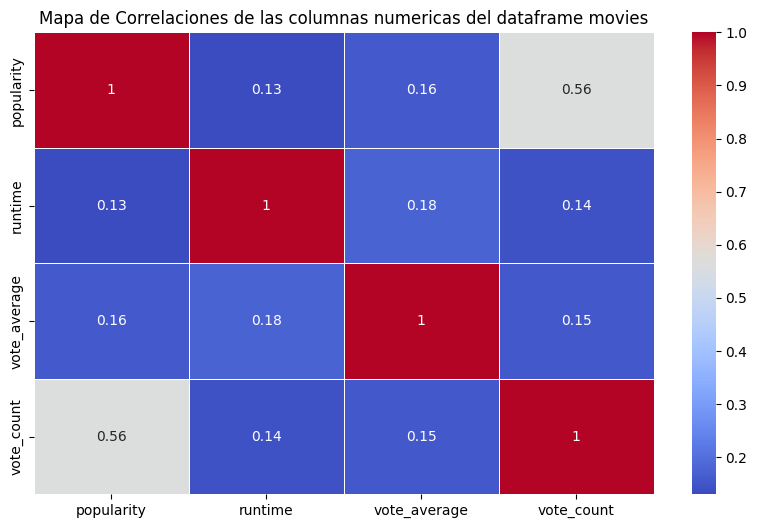

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones de las columnas numericas del dataframe movies')
plt.show()

In [85]:
movies.iloc[0]

movie_id                                                           862
original_language                                                   en
overview             Led by Woody, Andy's toys live happily in his ...
popularity                                                   21.946943
runtime                                                           81.0
tagline                                                           None
title                                                        Toy Story
vote_average                                                       7.7
vote_count                                                        5415
genre_name                                                   Animation
spoken_language                                                English
Name: 0, dtype: object

In [86]:
movies['original_language'].value_counts()

original_language
en    79773
fr     6275
ja     3768
it     3061
de     2632
      ...  
sm        1
la        1
hy        1
rw        1
si        1
Name: count, Length: 88, dtype: int64

In [87]:
movies['spoken_language'].value_counts()

spoken_language
English     62178
Français     8597
Deutsch      5491
Español      5092
Italiano     4517
            ...  
Malti           5
Bokmål          3
ozbek           3
Fulfulde        2
Hausa           1
Name: count, Length: 75, dtype: int64

In [88]:
movies['genre_name'].value_counts()

genre_name
Drama              25497
Comedy             15411
Thriller            9929
Action              8953
Romance             8384
Crime               5545
Horror              5399
Adventure           4843
Documentary         4054
Science Fiction     3623
Family              3327
Mystery             3104
Fantasy             2867
Animation           2267
War                 2211
History             2174
Foreign             1933
Music               1827
Western             1232
TV Movie             810
Name: count, dtype: int64

In [121]:
columnas_de_texto = movies.select_dtypes(include=[object])

In [122]:
columnas_de_texto.head()

,movie_id,original_language,overview,tagline,title,genre_name,spoken_language
0,862,en,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story,Animation,English
1,862,en,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story,Comedy,English
2,862,en,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story,Family,English
3,8844,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,Adventure,English
4,8844,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,Adventure,Français


In [123]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   movie_id           113390 non-null  object
 1   original_language  113371 non-null  object
 2   overview           112446 non-null  object
 3   tagline            60710 non-null   object
 4   title              113390 non-null  object
 5   genre_name         113390 non-null  object
 6   spoken_language    113390 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB


In [124]:
columnas_de_texto.drop(columns=['original_language','spoken_language','genre_name'], inplace=True)

In [125]:
columnas_de_texto

,movie_id,overview,tagline,title
0,862,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story
1,862,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story
2,862,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story
3,8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji
4,8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji
...,...,...,...,...
113385,30840,"Yet another version of the classic epic, with ...",None,Robin Hood
113386,111109,An artist struggles to finish his work while a...,None,Century of Birthing
113387,67758,"When one of her hits goes wrong, a professiona...",A deadly game of wits.,Betrayal
113388,67758,"When one of her hits goes wrong, a professiona...",A deadly game of wits.,Betrayal


In [126]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   movie_id  113390 non-null  object
 1   overview  112446 non-null  object
 2   tagline   60710 non-null   object
 3   title     113390 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


In [127]:
columnas_de_texto.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [128]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39982 entries, 0 to 39981
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  39982 non-null  object
 1   overview  39436 non-null  object
 2   tagline   19377 non-null  object
 3   title     39982 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [129]:
columnas_de_texto.drop(columns=['movie_id'], inplace=True)

In [130]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39982 entries, 0 to 39981
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  39436 non-null  object
 1   tagline   19377 non-null  object
 2   title     39982 non-null  object
dtypes: object(3)
memory usage: 937.2+ KB


In [113]:
texto_a_analizar = ' '.join(columnas_de_texto[col].str.cat(sep=' ') for col in columnas_de_texto.columns)

In [114]:
nube_de_palabras_1 = WordCloud(width=800, height=400, background_color='white').generate(texto_a_analizar)

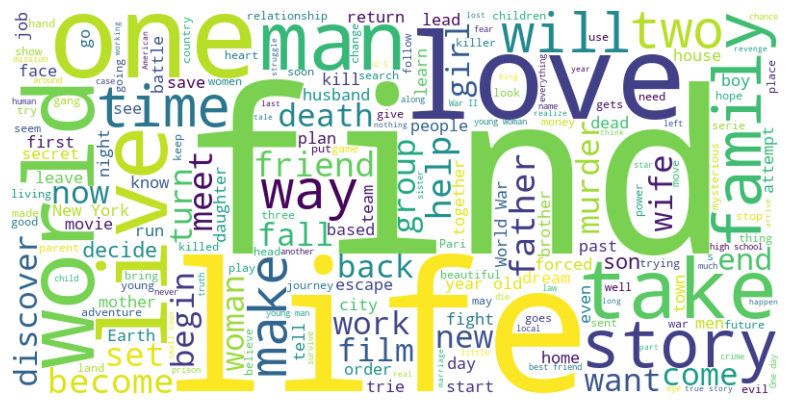

In [115]:
plt.figure(figsize=(10, 5))
plt.imshow(nube_de_palabras_1, interpolation='bilinear')
plt.axis('off')
plt.show()